## Accuracy Loss Plots 1 (Classifer 2)

### Initial Results

In [1]:
## Plotting library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

## Keras library to load
from keras.models import load_model
from keras.models import Sequential
import tensorflow as tf

%matplotlib inline

Using TensorFlow backend.


In [2]:
with open('./cnn_model/classifer_2/model1_hist.pkl','rb') as file_name:
    model1_hist = pickle.load(file_name)

In [3]:
with open('./cnn_model/classifer_2/model2_hist.pkl','rb') as file_name:
    model2_hist = pickle.load(file_name)

In [4]:
with open('./cnn_model/classifer_2/model3_hist.pkl','rb') as file_name:
    model3_hist = pickle.load(file_name)

In [5]:
with open('./cnn_model/classifer_2/model4_hist.pkl','rb') as file_name:
    model4_hist = pickle.load(file_name)

In [6]:
with open('./cnn_model/classifer_2/model5_hist.pkl','rb') as file_name:
    model5_hist = pickle.load(file_name)

In [7]:
with open('./cnn_model/classifer_2/model5_2_hist.pkl','rb') as file_name:
    model5_2_hist = pickle.load(file_name)

In [8]:
with open('./cnn_model/classifer_2/model6_hist.pkl','rb') as file_name:
    model6_hist = pickle.load(file_name)

In [9]:
with open('./cnn_model/classifer_2/model6_2_hist.pkl','rb') as file_name:
    model6_2_hist = pickle.load(file_name)

In [10]:
with open('./cnn_model/classifer_2/model7_hist.pkl','rb') as file_name:
    model7_hist = pickle.load(file_name)

In [11]:
with open('./cnn_model/classifer_2/model8_hist.pkl','rb') as file_name:
    model8_hist = pickle.load(file_name)

In [ ]:
model1 = load_model('./cnn_model/classifer_2/model1.h5')

In [ ]:
model2 = load_model('./cnn_model/classifer_2/model2.h5')

In [ ]:
model3 = load_model('./cnn_model/classifer_2/model3.h5')

In [ ]:
model4 = load_model('./cnn_model/classifer_2/model4.h5')

In [ ]:
model5 = load_model('./cnn_model/classifer_2/model5.h5')

In [ ]:
model5_2 = load_model('./cnn_model/classifer_2/model5_2.h5')

In [ ]:
model6 = load_model('./cnn_model/classifer_2/model6.h5')

In [ ]:
model6 = load_model('./cnn_model/classifer_2/model6_2.h5')

In [ ]:
model7 = load_model('./cnn_model/classifer_2/model7.h5')

In [ ]:
model8 = load_model('./cnn_model/classifer_2/model8.h5')

## Classifer 2 (Ying et al, 2017)
#### Blackbox empirical testing and fine tuning

6 plots to check the effects of some fine tune parameters for CNN

Baseline: Classifer 3

    SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)

    model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True), metrics=['accuracy'])
    
    model.fit(x, y, batch_size=64, epochs=150, validation_split=0.2)

Parameters to check: 

    1) No of Dropout layers included
    2) Batch size = 32, 64, 128
    3) Learning rate = 0.01, 0.001
    4) Dropout rate = 0.2, 0.5
    5) Epoch = 150, 300 --- additional 200 epoch to check
    6) Optimizer = Adam vs SGD
   

### 1) Effect of Dropout layers

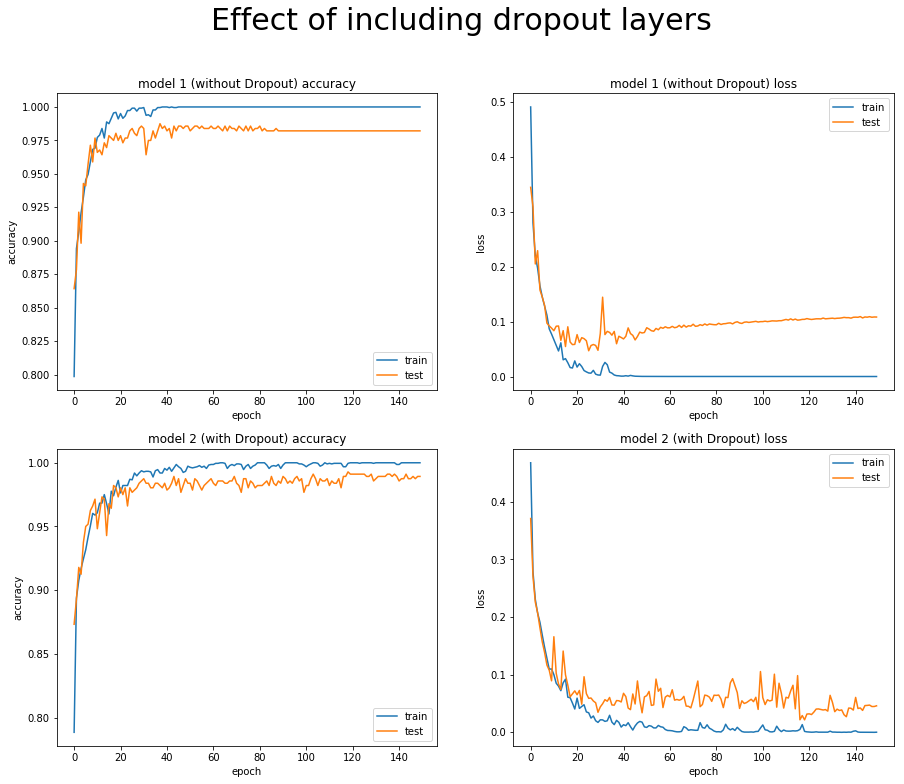

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

### Model 1
plt.suptitle('Effect of including dropout layers', fontsize=30)

## no dropout layer
ax[0,0].plot(model1_hist['acc'])
ax[0,0].plot(model1_hist['val_acc'])
ax[0,0].set_title('model 1 (without Dropout) accuracy')
ax[0,0].set_ylabel('accuracy')
ax[0,0].set_xlabel('epoch')
ax[0,0].legend(['train', 'test'], loc='lower right')

ax[0,1].plot(model1_hist['loss'])
ax[0,1].plot(model1_hist['val_loss'])
ax[0,1].set_title('model 1 (without Dropout) loss')
ax[0,1].set_ylabel('loss')
ax[0,1].set_xlabel('epoch')
ax[0,1].legend(['train', 'test'], loc='upper right')

### Model 2

## dropout(0.2) at every layer
ax[1,0].plot(model2_hist['acc'])
ax[1,0].plot(model2_hist['val_acc'])
ax[1,0].set_title('model 2 (with Dropout) accuracy')
ax[1,0].set_ylabel('accuracy')
ax[1,0].set_xlabel('epoch')
ax[1,0].legend(['train', 'test'], loc='lower right')

ax[1,1].plot(model2_hist['loss'])
ax[1,1].plot(model2_hist['val_loss'])
ax[1,1].set_title('model 2 (with Dropout) loss')
ax[1,1].set_ylabel('loss')
ax[1,1].set_xlabel('epoch')
ax[1,1].legend(['train', 'test'], loc='upper right')

plt.show()

Model 1: Overfitting --- test loss is increasing while train loss is converge. Meaning CNN can classify train set well but fail to generalise to test set. Training should stop after 60 epoch as loss converges

Model 2: Unstable accuracy and loss due to noise introduce by Dropout regularization. Training should stop after 60 epoch.

### 2) Effect of Batch Size

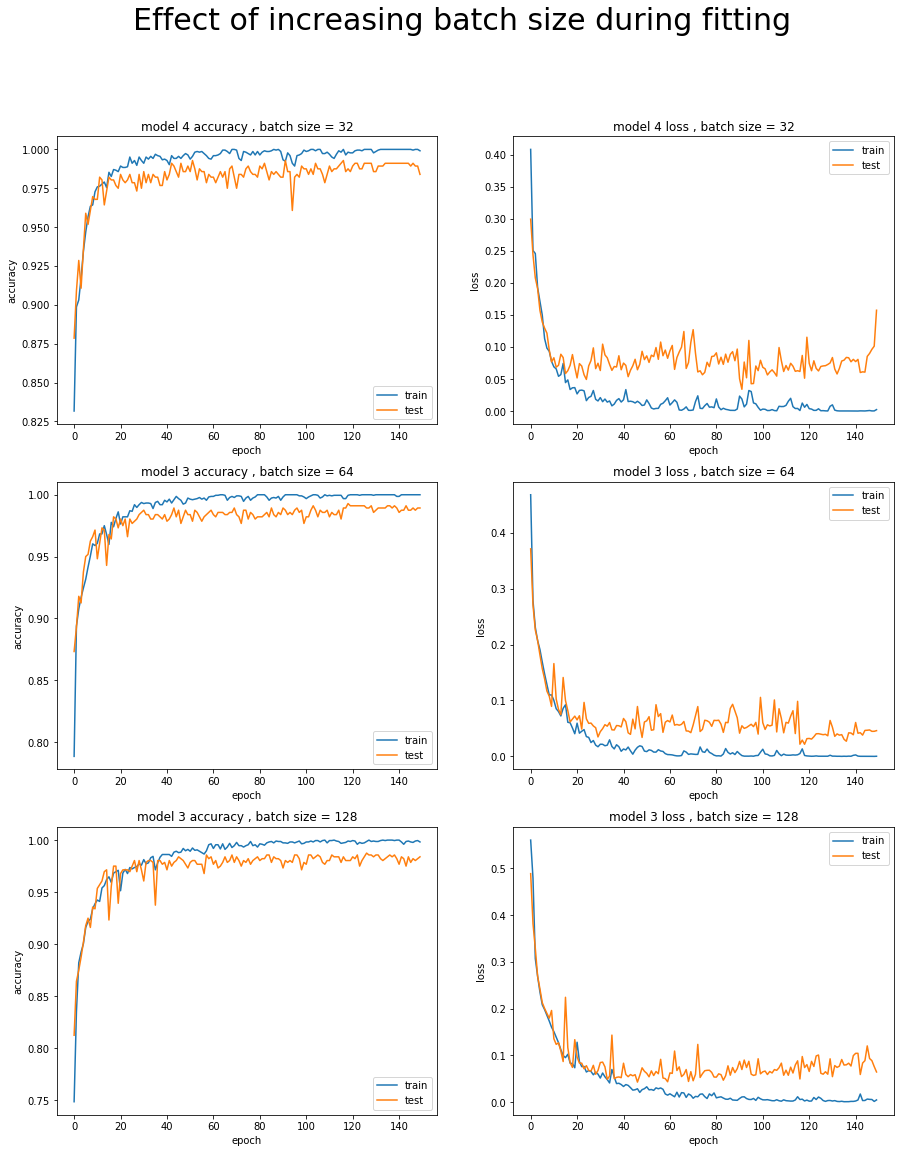

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,18))

### Model 4

plt.suptitle('Effect of increasing batch size during fitting', fontsize=30)

### batch size = 32
ax[0,0].plot(model4_hist['acc'])
ax[0,0].plot(model4_hist['val_acc'])
ax[0,0].set_title('model 4 accuracy , batch size = 32')
ax[0,0].set_ylabel('accuracy')
ax[0,0].set_xlabel('epoch')
ax[0,0].legend(['train', 'test'], loc='lower right')

ax[0,1].plot(model4_hist['loss'])
ax[0,1].plot(model4_hist['val_loss'])
ax[0,1].set_title('model 4 loss , batch size = 32')
ax[0,1].set_ylabel('loss')
ax[0,1].set_xlabel('epoch')
ax[0,1].legend(['train', 'test'], loc='upper right')

### Model 2

### batch size = 64
ax[1,0].plot(model2_hist['acc'])
ax[1,0].plot(model2_hist['val_acc'])
ax[1,0].set_title('model 3 accuracy , batch size = 64')
ax[1,0].set_ylabel('accuracy')
ax[1,0].set_xlabel('epoch')
ax[1,0].legend(['train', 'test'], loc='lower right')

ax[1,1].plot(model2_hist['loss'])
ax[1,1].plot(model2_hist['val_loss'])
ax[1,1].set_title('model 3 loss , batch size = 64')
ax[1,1].set_ylabel('loss')
ax[1,1].set_xlabel('epoch')
ax[1,1].legend(['train', 'test'], loc='upper right')

### Model 3

### batch size = 128
ax[2,0].plot(model3_hist['acc'])
ax[2,0].plot(model3_hist['val_acc'])
ax[2,0].set_title('model 3 accuracy , batch size = 128')
ax[2,0].set_ylabel('accuracy')
ax[2,0].set_xlabel('epoch')
ax[2,0].legend(['train', 'test'], loc='lower right')

ax[2,1].plot(model3_hist['loss'])
ax[2,1].plot(model3_hist['val_loss'])
ax[2,1].set_title('model 3 loss , batch size = 128')
ax[2,1].set_ylabel('loss')
ax[2,1].set_xlabel('epoch')
ax[2,1].legend(['train', 'test'], loc='upper right')

plt.show()

No real benefit to increase or decrease batch size --- kept at 64 (most stable result)

### 3) Effects of decreasing learning rate

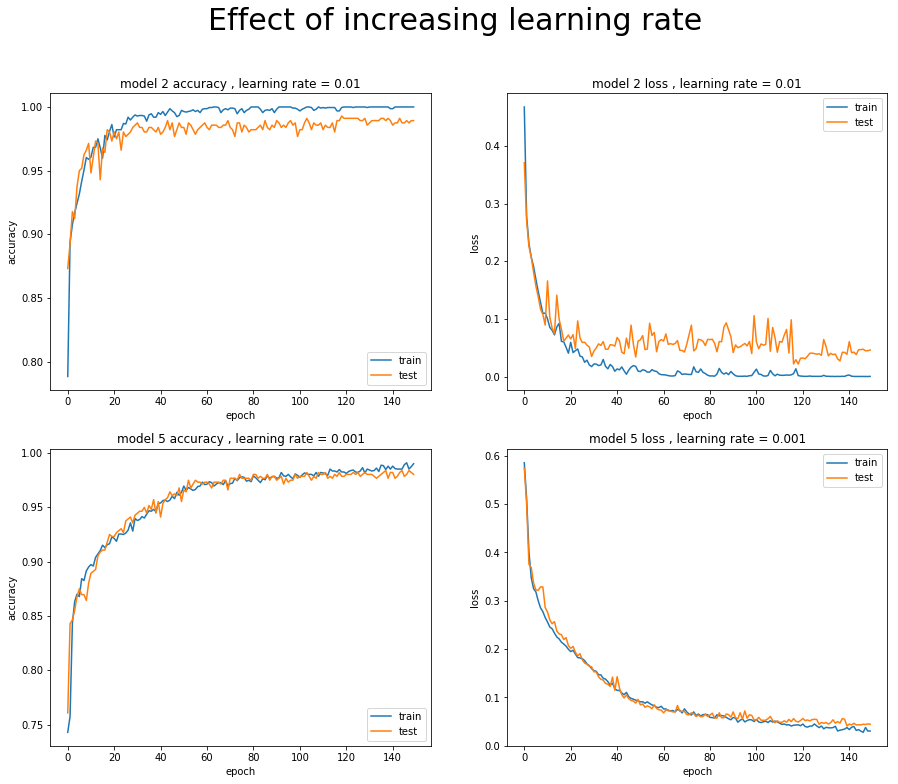

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

### Model 2
plt.suptitle('Effect of increasing learning rate', fontsize=30)

### Learning rate = 0.01

ax[0,0].plot(model2_hist['acc'])
ax[0,0].plot(model2_hist['val_acc'])
ax[0,0].set_title('model 2 accuracy , learning rate = 0.01')
ax[0,0].set_ylabel('accuracy')
ax[0,0].set_xlabel('epoch')
ax[0,0].legend(['train', 'test'], loc='lower right')

ax[0,1].plot(model2_hist['loss'])
ax[0,1].plot(model2_hist['val_loss'])
ax[0,1].set_title('model 2 loss , learning rate = 0.01')
ax[0,1].set_ylabel('loss')
ax[0,1].set_xlabel('epoch')
ax[0,1].legend(['train', 'test'], loc='upper right')

### Model 5

### Learning rate = 0.001

ax[1,0].plot(model5_hist['acc'])
ax[1,0].plot(model5_hist['val_acc'])
ax[1,0].set_title('model 5 accuracy , learning rate = 0.001')
ax[1,0].set_ylabel('accuracy')
ax[1,0].set_xlabel('epoch')
ax[1,0].legend(['train', 'test'], loc='lower right')

ax[1,1].plot(model5_hist['loss'])
ax[1,1].plot(model5_hist['val_loss'])
ax[1,1].set_title('model 5 loss , learning rate = 0.001')
ax[1,1].set_ylabel('loss')
ax[1,1].set_xlabel('epoch')
ax[1,1].legend(['train', 'test'], loc='upper right')

plt.show()

    1) lower learning rate is good
    2) test and train accuracy + loss converges
    3) More stable and good learning rate

### 4) Effects of increasing dropout rate, learning rate = 0.001

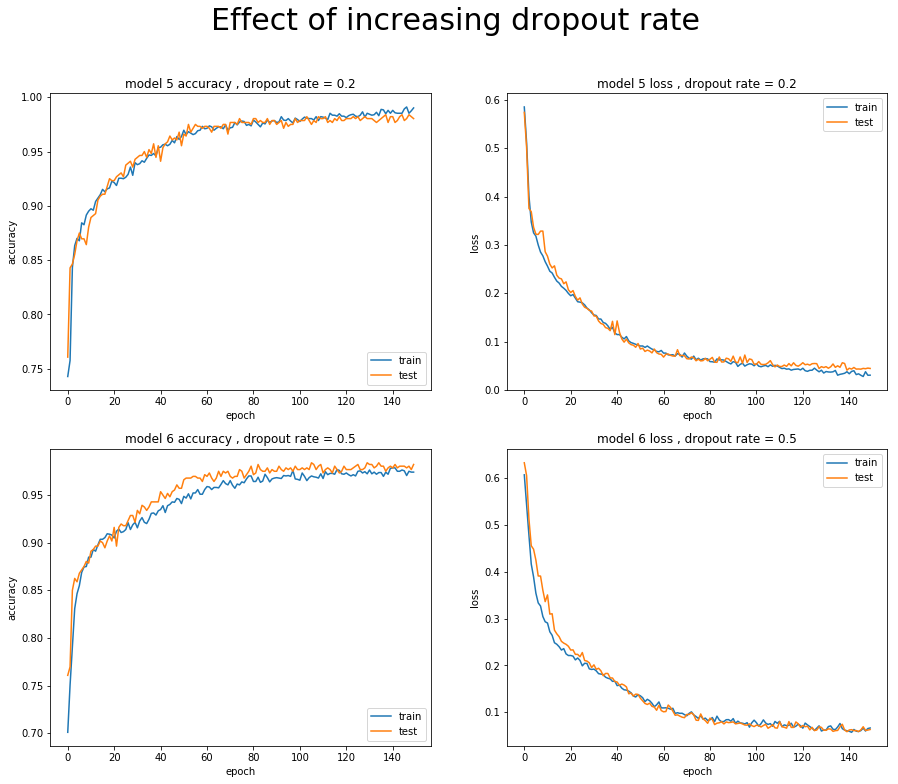

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

### Model 5
plt.suptitle('Effect of increasing dropout rate', fontsize=30)

ax[0,0].plot(model5_hist['acc'])
ax[0,0].plot(model5_hist['val_acc'])
ax[0,0].set_title('model 5 accuracy , dropout rate = 0.2')
ax[0,0].set_ylabel('accuracy')
ax[0,0].set_xlabel('epoch')
ax[0,0].legend(['train', 'test'], loc='lower right')

ax[0,1].plot(model5_hist['loss'])
ax[0,1].plot(model5_hist['val_loss'])
ax[0,1].set_title('model 5 loss , dropout rate = 0.2')
ax[0,1].set_ylabel('loss')
ax[0,1].set_xlabel('epoch')
ax[0,1].legend(['train', 'test'], loc='upper right')

### Model 6
ax[1,0].plot(model6_hist['acc'])
ax[1,0].plot(model6_hist['val_acc'])
ax[1,0].set_title('model 6 accuracy , dropout rate = 0.5')
ax[1,0].set_ylabel('accuracy')
ax[1,0].set_xlabel('epoch')
ax[1,0].legend(['train', 'test'], loc='lower right')

ax[1,1].plot(model6_hist['loss'])
ax[1,1].plot(model6_hist['val_loss'])
ax[1,1].set_title('model 6 loss , dropout rate = 0.5')
ax[1,1].set_ylabel('loss')
ax[1,1].set_xlabel('epoch')
ax[1,1].legend(['train', 'test'], loc='upper right')

plt.show()

    Both looks good. Increasing epoch to see the effect of these 2
    An epoch of 200 might be ideal

### 5) Effects of increasing epoch

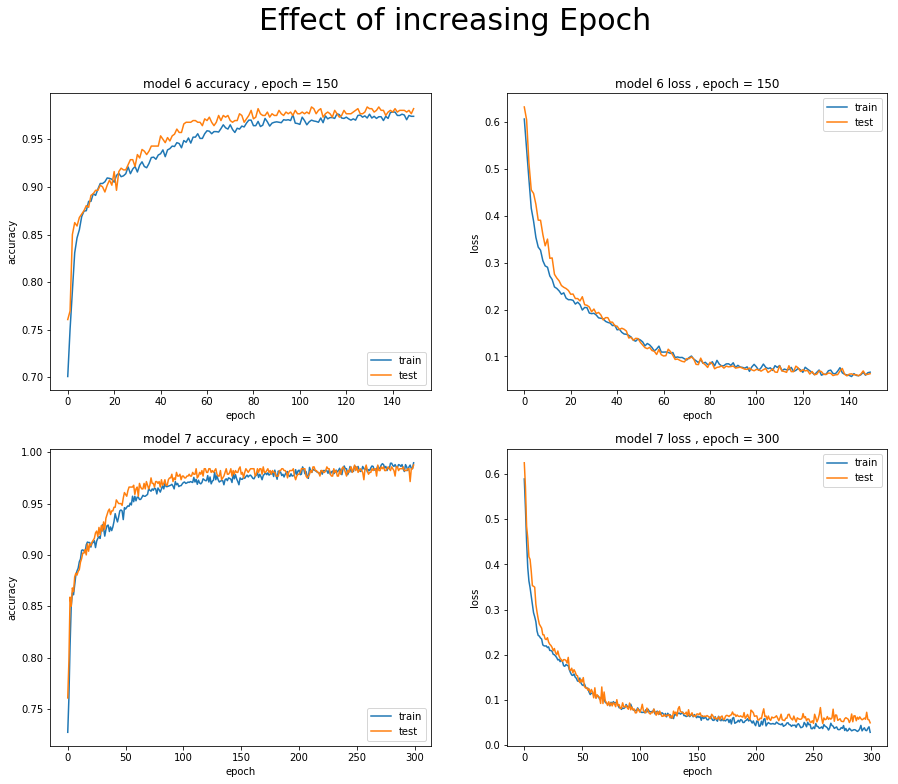

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

### Model 6
plt.suptitle('Effect of increasing Epoch', fontsize=30)

ax[0,0].plot(model6_hist['acc'])
ax[0,0].plot(model6_hist['val_acc'])
ax[0,0].set_title('model 6 accuracy , epoch = 150')
ax[0,0].set_ylabel('accuracy')
ax[0,0].set_xlabel('epoch')
ax[0,0].legend(['train', 'test'], loc='lower right')

ax[0,1].plot(model6_hist['loss'])
ax[0,1].plot(model6_hist['val_loss'])
ax[0,1].set_title('model 6 loss , epoch = 150')
ax[0,1].set_ylabel('loss')
ax[0,1].set_xlabel('epoch')
ax[0,1].legend(['train', 'test'], loc='upper right')

### Model 7
ax[1,0].plot(model7_hist['acc'])
ax[1,0].plot(model7_hist['val_acc'])
ax[1,0].set_title('model 7 accuracy , epoch = 300')
ax[1,0].set_ylabel('accuracy')
ax[1,0].set_xlabel('epoch')
ax[1,0].legend(['train', 'test'], loc='lower right')

ax[1,1].plot(model7_hist['loss'])
ax[1,1].plot(model7_hist['val_loss'])
ax[1,1].set_title('model 7 loss , epoch = 300')
ax[1,1].set_ylabel('loss')
ax[1,1].set_xlabel('epoch')
ax[1,1].legend(['train', 'test'], loc='upper right')

plt.show()

    After 200 epoch, training should stop as the accuracy had plateau and test loss start to increase slightly.

### 6) Adam vs SGD

same parameter setting
    
    1) model_7.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001, momentum=0.9, nesterov=True), metrics=['accuracy'])
    2) model_8.compile(loss='categorical_crossentropy', optimizer= Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), metrics=['accuracy'])

both have decay = 0.0


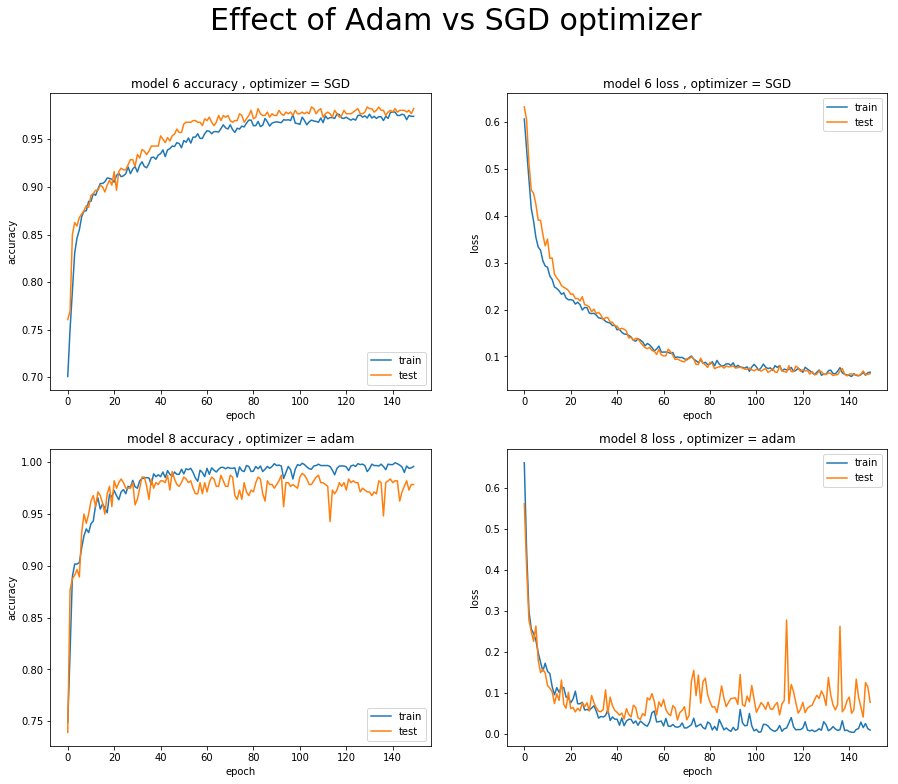

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

### Model 6
plt.suptitle('Effect of Adam vs SGD optimizer', fontsize=30)

ax[0,0].plot(model6_hist['acc'])
ax[0,0].plot(model6_hist['val_acc'])
ax[0,0].set_title('model 6 accuracy , optimizer = SGD')
ax[0,0].set_ylabel('accuracy')
ax[0,0].set_xlabel('epoch')
ax[0,0].legend(['train', 'test'], loc='lower right')

ax[0,1].plot(model6_hist['loss'])
ax[0,1].plot(model6_hist['val_loss'])
ax[0,1].set_title('model 6 loss , optimizer = SGD')
ax[0,1].set_ylabel('loss')
ax[0,1].set_xlabel('epoch')
ax[0,1].legend(['train', 'test'], loc='upper right')

### Model 8
ax[1,0].plot(model8_hist['acc'])
ax[1,0].plot(model8_hist['val_acc'])
ax[1,0].set_title('model 8 accuracy , optimizer = adam')
ax[1,0].set_ylabel('accuracy')
ax[1,0].set_xlabel('epoch')
ax[1,0].legend(['train', 'test'], loc='lower right')

ax[1,1].plot(model8_hist['loss'])
ax[1,1].plot(model8_hist['val_loss'])
ax[1,1].set_title('model 8 loss , optimizer = adam')
ax[1,1].set_ylabel('loss')
ax[1,1].set_xlabel('epoch')
ax[1,1].legend(['train', 'test'], loc='upper right')

plt.show()

With different optimizer , fine tuning is need. As such not a good comparsion. Stick with SGD

## Try for model 5 and model 6, train to 200 epoch

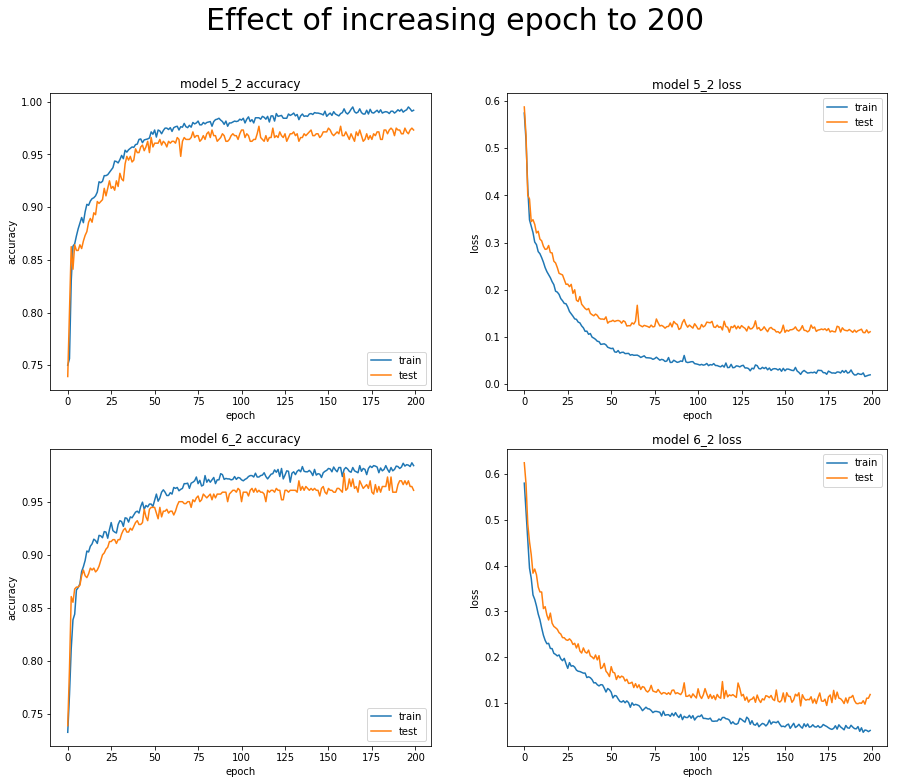

In [28]:
### model 5_2 and 6_2 uses data that were reshuffled

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

### Model 5_2
plt.suptitle('Effect of increasing epoch to 200', fontsize=30)

ax[0,0].plot(model5_2_hist['acc'])
ax[0,0].plot(model5_2_hist['val_acc'])
ax[0,0].set_title('model 5_2 accuracy')
ax[0,0].set_ylabel('accuracy')
ax[0,0].set_xlabel('epoch')
ax[0,0].legend(['train', 'test'], loc='lower right')

ax[0,1].plot(model5_2_hist['loss'])
ax[0,1].plot(model5_2_hist['val_loss'])
ax[0,1].set_title('model 5_2 loss')
ax[0,1].set_ylabel('loss')
ax[0,1].set_xlabel('epoch')
ax[0,1].legend(['train', 'test'], loc='upper right')

### Model 6_2

ax[1,0].plot(model6_2_hist['acc'])
ax[1,0].plot(model6_2_hist['val_acc'])
ax[1,0].set_title('model 6_2 accuracy')
ax[1,0].set_ylabel('accuracy')
ax[1,0].set_xlabel('epoch')
ax[1,0].legend(['train', 'test'], loc='lower right')

ax[1,1].plot(model6_2_hist['loss'])
ax[1,1].plot(model6_2_hist['val_loss'])
ax[1,1].set_title('model 6_2 loss')
ax[1,1].set_ylabel('loss')
ax[1,1].set_xlabel('epoch')
ax[1,1].legend(['train', 'test'], loc='upper right')

plt.show()